In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"default_of_credit_card_clients.xls", header=1)
df=df.drop(columns=['ID'])
df["EDUCATION"] = df["EDUCATION"].map(lambda x: 4 if (x > 4 or x < 1) else x)
df["MARRIAGE"] = df["MARRIAGE"].map(lambda x: 3 if (x > 3 or x < 1) else x)
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
#df=df.astype({'DEFAULT': 'category'})
#add 1 to all pay columns
df.iloc[:,5:11] = df.iloc[:,5:11].add(1)

In [3]:
#create a new data frame only with SEX and DEFAULT collumns

# Step 1: Filter for Defaults
defaults = df[df['DEFAULT'] == 1]

# Step 2: Group and Count Defaults
default_counts_sex = defaults.groupby('SEX').size()
default_counts_marriage = defaults.groupby('MARRIAGE').size()
default_counts_education = defaults.groupby('EDUCATION').size()
#group age in 15 year bins
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 35, 50, 65, 80], labels=['20-34', '35-49', '50-64', '65-79'])
default_counts_age = defaults.groupby('AGE_GROUP').size()



# Step 3: Calculate Total Counts per Sex
total_counts_sex = df.groupby('SEX').size()
total_counts_marriage = df.groupby('MARRIAGE').size()
total_counts_education = df.groupby('EDUCATION').size()
total_counts_age = df.groupby('AGE_GROUP').size()


# Step 4: Calculate Percentages
percentage_defaults_sex = (default_counts_sex / total_counts_sex) * 100
percentage_defaults_marriage = (default_counts_marriage / total_counts_marriage) * 100
percentage_defaults_education = (default_counts_education / total_counts_education) * 100
percentage_defaults_age = (default_counts_age / total_counts_age) * 100

percentage_non_defaults_sex = 100 - percentage_defaults_sex
percentage_non_defaults_marriage = 100 - percentage_defaults_marriage
percentage_non_defaults_education = 100 - percentage_defaults_education
percentage_non_defaults_age = 100 - percentage_defaults_age


# Define the bar width
bar_width = 0.7
new_blue= '#1f77b4'
new_orange ='#ff7f0e'
# Create a bar plot
#fig, ax = plt.subplots()

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0][0].bar(percentage_defaults_sex.index, percentage_non_defaults_sex.values, bottom=percentage_defaults_sex.values, color=new_blue, width=bar_width, label='Non-defaults')
i = 0
for p in ax[0][0].patches:
    ax[0][0].annotate('  Total: \n'+str(total_counts_sex.iloc[i]),
                        xy=(p.get_x() + p.get_width() / 2, 100),
                        xytext=(0, -30),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom',color='white',fontweight="bold")
    i+=1

ax[0][0].bar(percentage_defaults_sex.index, percentage_defaults_sex.values, color = new_orange, width=bar_width, label='Defaults')
# Adding labels and title
ax[0, 0].set_xlabel('Sex')
ax[0, 0].set_title('Defaults by Sex')
ax[0, 0].set_ylabel('Percentage')
ax[0, 0].set_xticks(percentage_defaults_sex.index)


ax[0][1].bar(percentage_defaults_marriage.index, percentage_non_defaults_marriage.values, bottom=percentage_defaults_marriage.values, color=new_blue, width=bar_width, label='Non-defaults')
i = 0
for p in ax[0][1].patches:
    ax[0][1].annotate('  Total: \n'+str(total_counts_marriage.iloc[i]),
                        xy=(p.get_x() + p.get_width() / 2, 100),
                        xytext=(0, -30),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom',color='white',fontweight="bold")
    i+=1

ax[0][1].bar(percentage_defaults_marriage.index, percentage_defaults_marriage.values, color = new_orange, width=bar_width, label='Defaults')
# Adding labels and title
ax[0, 1].set_xlabel('Marriage')
ax[0, 1].set_title('Defaults by Marriage')
ax[0, 1].set_ylabel('Percentage')
ax[0, 1].set_xticks(percentage_defaults_marriage.index)


ax[1][0].bar(percentage_defaults_education.index, percentage_non_defaults_education.values, bottom=percentage_defaults_education.values, color=new_blue, width=bar_width, label='Non-defaults')
i = 0
for p in ax[1][0].patches:
    ax[1][0].annotate('  Total: \n'+str(total_counts_education.iloc[i]),
                        xy=(p.get_x() + p.get_width() / 2, 100),
                        xytext=(0, -30),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom',color='white',fontweight="bold")
    i+=1

ax[1][0].bar(percentage_defaults_education.index, percentage_defaults_education.values, color = new_orange, width=bar_width, label='Defaults')
# Adding labels and title
ax[1, 0].set_xlabel('Education')
ax[1, 0].set_title('Defaults by Education')
ax[1, 0].set_ylabel('Percentage')
ax[1, 0].set_xticks(percentage_defaults_education.index)


ax[1][1].bar(percentage_defaults_age.index, percentage_non_defaults_age.values, bottom=percentage_defaults_age.values, color=new_blue, width=bar_width, label='Non-defaults')
i = 0
for p in ax[1][1].patches:
    ax[1][1].annotate('  Total: \n'+str(total_counts_age.iloc[i]),
                        xy=(p.get_x() + p.get_width() / 2, 100),
                        xytext=(0, -30),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom',color='white',fontweight="bold")
    i+=1

ax[1][1].bar(percentage_defaults_age.index, percentage_defaults_age.values, color = new_orange, width=bar_width, label='Defaults')
# Adding labels and title
ax[1, 1].set_xlabel('Age')
ax[1, 1].set_title('Defaults by Age')
ax[1, 1].set_ylabel('Percentage')
ax[1, 1].set_xticks(percentage_defaults_age.index)

plt.tight_layout()
plt.show()



KeyError: 'AGE_GROUP'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_plot(i):
    print(i)
    months =[' September', ' August', ' July', ' June', ' May', ' April']
    percentage_defaults_pay_0 = (df.groupby('PAY_'+str(i))['DEFAULT'].sum() / df.groupby('PAY_'+str(i))['DEFAULT'].count()) * 100
    #print month 0 in  red
    title = ""
    for j in range(5,-1,-1):
        if j==i-1:
            title+= ' $\\mathbf{'+months[j]+'}$'
        else:
            title+= months[j]
    

    percentage_non_defaults_pay_0 = 100 - percentage_defaults_pay_0
    plt.bar(percentage_defaults_pay_0.index, percentage_non_defaults_pay_0.values, bottom=percentage_defaults_pay_0.values, color=new_blue, width=bar_width, label='Non-defaults')
    plt.bar(percentage_defaults_pay_0.index, percentage_defaults_pay_0.values, color = new_orange, width=bar_width, label='Defaults')
    # Adding labels and title
    plt.xlabel('PAY_'+str(i))
    plt.title(r'Defaults by repayment status in '+ title)
    plt.ylabel('Percentage')
    plt.xticks(percentage_defaults_pay_0.index)
    plt.legend()
    

animate 0
6
animate 0
6
animate 1
5
animate 2
4
animate 3
3
animate 4
2
animate 5
1
animate 0
6


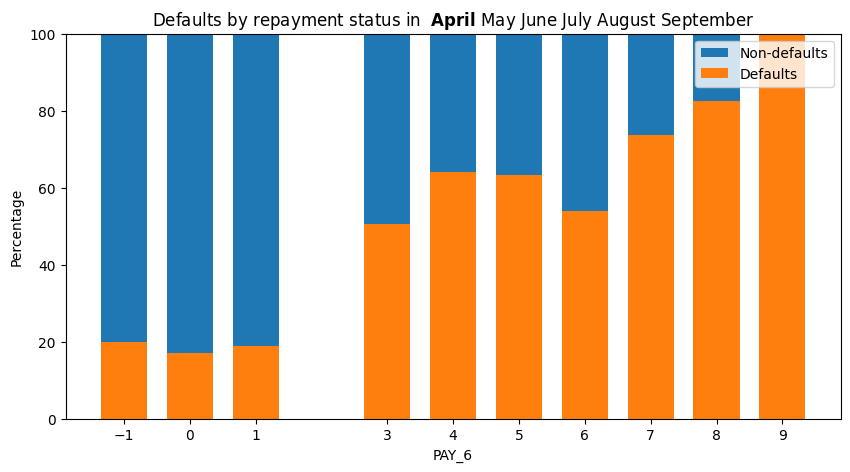

In [ ]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10,5))

# Creating an animation
def animate(i):
    #print("animate",i)
    plt.clf()  # Clear the current figure
    create_plot(6-i)  # Create a new plot

ani = FuncAnimation(fig, animate, frames=6, interval=2000)  # 6 frames, 1 second apart
ani.save('plots.gif', writer='pillow')